In [85]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math
import array
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [86]:
#load data from file
train = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
x_t = np.arange(0,3,0.001)
x_v = np.arange(0,3,0.003)
N = train.shape[0]
Nv = validate.shape[0]
#plt.subplot(121)
#plt.plot(x_t,train,'r')
#plt.axis('scaled')
#plt.subplot(122)
#plt.plot(x_v,validate,'r')
#plt.axis('scaled')

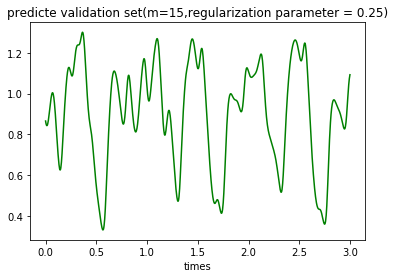

In [87]:
#function to return the EMR of this method
# training data adn validation
lamd = np.arange(0,0.5,0.01)
MSE_v = np.zeros(shape=(50,32))
x = []
y = []
z = []
y_v = []
m = 15
l = 0.25
X = np.zeros(shape=(m,N-m))
Y = train[m:N]
for i in range(0,N-m):
    temp = train[i:i+m]
    X[:,i] = temp[::-1]
r = (X@X.T)/(N-m)
R = r+l*np.identity(m)
P = (X@Y)/(N-m)
W = np.linalg.inv(R)@P
Xv = np.zeros(shape=(m,Nv-m))
Yv = validate[m:Nv]
for j in range(0,Nv-m):
    temp = validate[j:j+m]
    Xv[:,j] = temp[::-1]
yv = W.T@Xv
for a in range(m):
    y_v.append(validate[a])
for b in range(0,Nv-m):
    y_v.append(yv[b])
#for n in range(0,Nv-m):
    #MSE[n] = (Yv[n] - yv[n])**2
#MSE_v[l,m] = MSE.sum()/(Nv-m)
p1 = plt.subplot(111)
p1 = plt.plot(x_v,validate,'g')
plt.xlabel('times')
plt.title('predicte validation set(m=15,regularization parameter = 0.25)')
#p2 = plt.subplot(222)
#p2 = plt.plot(x_v,validate,'r')
#plt.xlabel('times')
#plt.title('Original validation data set')
#x.append(m)
#y.append(lamd[l])
#z.append(MSE.sum()/(Nv-m))
